# Imports

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from src.config import *
#import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#import re, string
#from nltk.tag.stanford import StanfordPOSTagger as POS_Tag #Download the tagger from the site: https://nlp.stanford.edu/software/tagger.shtml Extract the file:stanford-postagger.jar
#import os
#from nltk import FreqDist
#import random
#from nltk import classify
#from nltk import NaiveBayesClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdlsajor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## init

In [2]:
plt.close('all')
pd.options.display.max_rows = 999

In [3]:
excluded_files = ['coronavirus-covid19-tweets.zip', 'Countries.CSV', 'Hashtags.CSV', '.gitkeeper']

In [4]:
raw_data_path = '../data/raw'
all_files = os.listdir(raw_data_path)

In [5]:
csv_files = [i for i in all_files if i not in excluded_files]

In [6]:
csv_files

['2020-03-26 Coronavirus Tweets.CSV',
 '2020-03-21 Coronavirus Tweets.CSV',
 '2020-03-25 Coronavirus Tweets.CSV',
 '2020-03-24 Coronavirus Tweets.CSV',
 '2020-03-14 Coronavirus Tweets.CSV',
 '2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV',
 '2020-03-30 Coronavirus Tweets.CSV',
 '2020-03-13 Coronavirus Tweets.CSV',
 '2020-03-18 Coronavirus Tweets.CSV',
 '2020-03-27 Coronavirus Tweets.CSV',
 '2020-03-28 Coronavirus Tweets.CSV',
 '2020-03-23 Coronavirus Tweets.CSV',
 '2020-03-12 Coronavirus Tweets.CSV',
 '2020-03-29 Coronavirus Tweets.CSV',
 '2020-03-20 Coronavirus Tweets.CSV',
 '2020-03-19 Coronavirus Tweets.CSV',
 '2020-03-16 Coronavirus Tweets.CSV',
 '2020-03-15 Coronavirus Tweets.CSV',
 '2020-03-31 Coronavirus Tweets.CSV',
 '2020-04-01 Coronavirus Tweets.CSV',
 '2020-03-17 Coronavirus Tweets.CSV',
 '2020-03-22 Coronavirus Tweets.CSV']

In [7]:
df_at_glace = pd.read_csv(raw_data_path + '/' + '2020-03-26 Coronavirus Tweets.CSV', encoding='utf-8')

# At glace

In [8]:
df_at_glace

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1242964482013499392,43910684,2020-03-26T00:00:00Z,La_SER,🔴 DIRECTO | @sanchezcastejon\n\n“No se conocía...,TweetDeck,NaN,NaN,NaN,False,...,11,NaN,NaN,NaN,1220993,874,NaN,2009-06-01T16:07:07Z,True,es
1,1242964483435356167,58114629,2020-03-26T00:00:00Z,laarimoraes,Acalento do dia: Uma amiga da família que é mé...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,298,154,NaN,2009-07-19T03:49:54Z,False,pt
2,1242964481451249664,16683014,2020-03-26T00:00:00Z,allafrica,The new coronavirus spread to dozens of Africa...,Twitter for Advertisers,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,397190,1812,NaN,2008-10-10T13:27:42Z,True,en
3,1242964483447848966,380567317,2020-03-26T00:00:00Z,ExpPolitica,El #CoViD19 es una de las epidemias con sello ...,Twitter Media Studio,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,556239,16,NaN,2011-09-26T21:28:08Z,True,es
4,1242964482378231808,132225222,2020-03-26T00:00:00Z,SSalud_mx,¡#Infórmate! #ConferenciaDePrensa sobre el #Co...,TweetDeck,NaN,NaN,NaN,False,...,52,NaN,NaN,NaN,786469,210,NaN,2010-04-12T16:53:45Z,True,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881273,1243326866523672581,498958901,2020-03-26T23:59:59Z,Ainslie_Ward24,As the situation with the #COVID19 pandemic co...,Twitter Web App,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1081,1861,NaN,2012-02-21T16:22:08Z,False,en
881274,1243326866511011841,541661771,2020-03-26T23:59:59Z,ResilienceInYou,Q4: Self-compassion is a positive way to be #k...,Twitter Web App,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1576,922,NaN,2012-03-31T13:38:13Z,False,en
881275,1243326866041319430,55364400,2020-03-26T23:59:59Z,the_icehouse,Your Icehouse COVID-19 business resource and s...,HubSpot,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,9607,1386,NaN,2009-07-09T21:14:01Z,False,en
881276,1243326865592537094,1157065694938357763,2020-03-26T23:59:59Z,_SassyNora,Me running to the nail salon and my eyebrow la...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,521,42,NaN,2019-08-01T23:08:53Z,False,en


# Read Files

In [9]:
use_columns = ['created_at','text', 'retweet_count', 'country_code', 'followers_count', 'lang', 'screen_name']
data_frames = []
for file in csv_files:
    df = pd.read_csv( raw_data_path + '/' + file, encoding='utf-8', usecols = use_columns)
    data_frames.append(df)

In [10]:
df = pd.concat(data_frames)

In [11]:
df.head(999)

,created_at,screen_name,text,retweet_count,country_code,followers_count,lang
0,2020-03-26T00:00:00Z,La_SER,🔴 DIRECTO | @sanchezcastejon\n\n“No se conocía...,11,NaN,1220993,es
1,2020-03-26T00:00:00Z,laarimoraes,Acalento do dia: Uma amiga da família que é mé...,0,NaN,298,pt
2,2020-03-26T00:00:00Z,allafrica,The new coronavirus spread to dozens of Africa...,1,NaN,397190,en
3,2020-03-26T00:00:00Z,ExpPolitica,El #CoViD19 es una de las epidemias con sello ...,1,NaN,556239,es
4,2020-03-26T00:00:00Z,SSalud_mx,¡#Infórmate! #ConferenciaDePrensa sobre el #Co...,52,NaN,786469,es
5,2020-03-26T00:00:00Z,diario24horas,Iván Duque decretó el aislamiento obligatorio ...,4,NaN,356474,es
6,2020-03-26T00:00:00Z,htTweets,The lockdown to battle the spread of coronavir...,3,NaN,7198294,en
7,2020-03-26T00:00:00Z,telediario,😲 La hija de la mujer de 61 años que falleció ...,9,NaN,43806,es
8,2020-03-26T00:00:00Z,ABSCBNNews,Apocalypse delayed? 'Walking Dead' finale post...,24,NaN,6757771,en
9,2020-03-26T00:00:00Z,889Noticias,"En plena contingencia por el #COVID19, se regi...",6,NaN,262780,es


# MX Twitts

In [57]:
mx_twitts = df.query('country_code == "MX"')

# ES twitts

In [12]:
es_twitts = df.query('lang == "es"')

In [13]:
es_twitts.count()

created_at         2227661
screen_name        2227661
text               2227661
retweet_count      2227661
country_code        112558
followers_count    2227661
lang               2227661
dtype: int64

# Total vs Es vs Mx

In [14]:
es_twitts.count()

created_at         2227661
screen_name        2227661
text               2227661
retweet_count      2227661
country_code        112558
followers_count    2227661
lang               2227661
dtype: int64

In [15]:
df.count()

created_at         14722353
screen_name        14722353
text               14722353
retweet_count      14722353
country_code         766549
followers_count    14722353
lang               14722353
dtype: int64

In [58]:
mx_twitts.count()

created_at         17061
screen_name        17061
text               17061
retweet_count      17061
country_code       17061
followers_count    17061
lang               17061
dtype: int64

In [16]:
total_twitts = df.count()['text']

In [17]:
total_es = es_twitts.count()['text']

In [53]:
total_mx = mx_twitts.count()['text']

In [55]:
twitts_total_and_es = {'labels': ['total', 'es', 'mx'], 'values': [total_twitts, total_es, total_mx]} 
d = pd.DataFrame(data=twitts_total_and_es)

# Chart Total vs ES

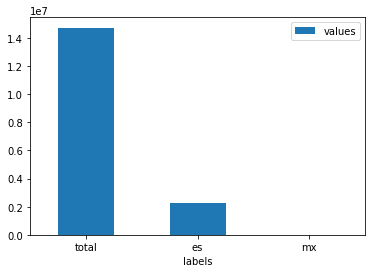

In [56]:
d.plot.bar(x='labels', y='values', rot=0)

# Es twitts acounting

In [22]:
screen_name_group = es_twitts.groupby('screen_name')

In [23]:
screen_name_total = es_twitts.groupby('screen_name')['text'].nunique().reset_index()

In [24]:
ten = screen_name_total.sort_values(by='text', ascending=False).head(10)

In [25]:
ten

,screen_name,text
229531,ReporteYa,3959
414269,lasopapuntocom,3432
7499,A_definitivas,3376
504648,tvnnoticias,2494
80917,EFEnoticias,2363
340730,diarioelheraldo,1887
202267,Notimex,1654
86192,ElPitazoTV,1630
47652,CaraotaDigital,1600
28282,Aroguden,1578


# clean memory

In [26]:
# df = None

# es twitts accounting Chart

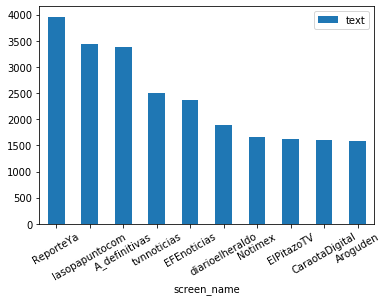

In [27]:
ten.plot.bar(x='screen_name', y='text', rot=30)

# Histogram twits ES

In [28]:
line_df = es_twitts.groupby('created_at')['text'].nunique().reset_index()

In [29]:
import matplotlib.dates as mdates
#line_df['created_at'] = pd.to_datetime(df['created_at'])

# Histogram twitts ES Chart

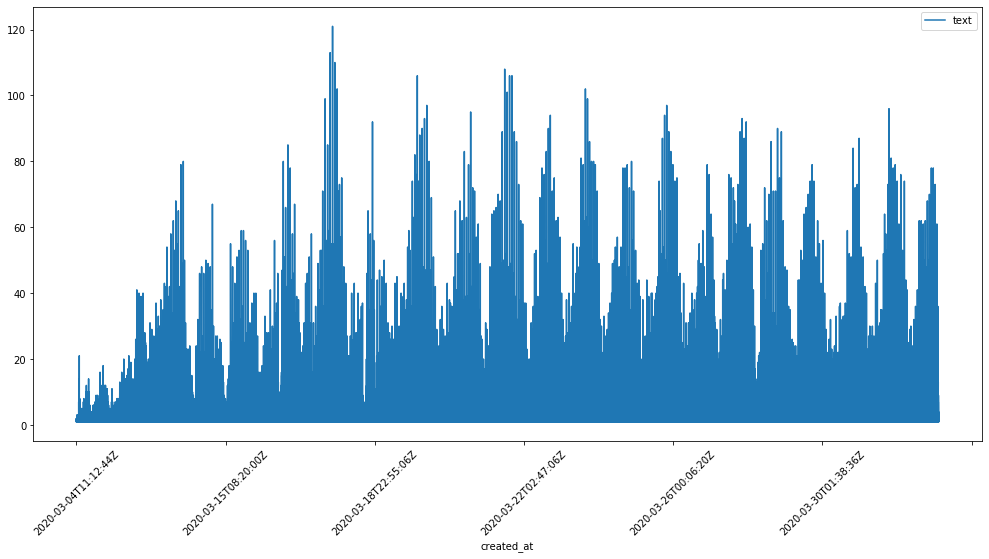

In [30]:
line_df.plot(figsize=(17,8), x='created_at', y='text', rot=45)

# Country code

In [31]:
cc = es_twitts.groupby('country_code')['text'].nunique().reset_index()

In [32]:
cc

,country_code,text
0,AD,26
1,AE,21
2,AO,2
3,AR,12598
4,AT,32
5,AU,100
6,AW,1
7,BA,2
8,BD,4
9,BE,83


In [33]:
cc.sort_values(by='text', ascending=False, inplace=True)

# Country code chart

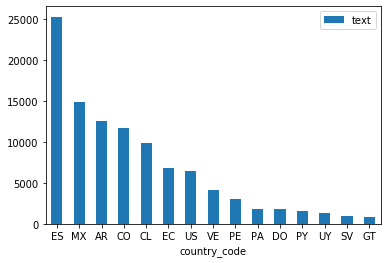

In [34]:
cc.head(15).plot.bar(x='country_code', y='text', rot=0)

# Count words

In [35]:
# change accentsb
es_twitts.replace('á','a', regex=True, inplace=True)
es_twitts.replace('é','e', regex=True, inplace=True)
es_twitts.replace('í','i', regex=True, inplace=True)
es_twitts.replace('ó','o', regex=True, inplace=True)
es_twitts.replace('ú','u', regex=True, inplace=True)

/home/skuarch/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [36]:
es_twitts.replace('#','', regex=True, inplace=True)
es_twitts.replace('!','', regex=True, inplace=True)
es_twitts.replace('@','', regex=True, inplace=True)
es_twitts.replace('$','', regex=True, inplace=True)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
text = es_twitts['text']
cv = CountVectorizer()
cv_fit=cv.fit_transform(text)

In [39]:
word_list = cv.get_feature_names()

In [40]:
word_list

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '000000000000000000000',
 '0000000000000000000000000000000001',
 '00000000001',
 '0000000001',
 '000000001',
 '00000001',
 '00000002',
 '0000001',
 '000000123',
 '000000189',
 '00000022',
 '00000077',
 '000000936',
 '000001',
 '0000013666',
 '0000022',
 '0000023',
 '0000024615',
 '000003',
 '0000036',
 '000004',
 '0000045',
 '0000047',
 '000005',
 '000006',
 '0000075',
 '000009',
 '0000092271',
 '00000998',
 '00000m',
 '00001',
 '0000160',
 '000018',
 '0000184',
 '000019',
 '00001metro',
 '00002',
 '000020',
 '0000216',
 '000023',
 '0000235',
 '000024',
 '000025',
 '000027',
 '00002954545',
 '00004',
 '000044',
 '000049',
 '00005',
 '000050',
 '000051',
 '000053',
 '000054',
 '000055',
 '000056',
 '00005625',
 '000057',
 '000058',
 '000059',
 '00006',
 '000060',
 '000061',
 '000062',
 '000063',
 '000068694864048',
 '00007',
 '000071',
 '000072',
 '0000755556',
 '000082352941176',
 '00009',
 '000096',
 '0000jdth6k',
 '0000osd',
 

In [41]:
count_list = np.asarray(cv_fit.sum(axis=0))

In [42]:
count_list

array([[16022, 37794,    56, ...,     1,     1,     1]], dtype=int64)

In [3]:
## Export csv twitts in Spanish
es_twitts.to_csv (r'C:\input\es_twitts.csv', index = None, header=True)

In [8]:
## Import csv twitts in Spanish
#es_twitts=pd.read_csv('C:\\input\\es_twitts.csv')

## Filtering by only MX
#es_twitts.query("country_code=='MX'").count()
#es_twitts=es_twitts.query("country_code=='MX'")

<h3>Tokenizing and Removing Noise from the Data</h3>

In [110]:
def remove_noise(desc, stop_words = ()):        
        
    desc = re.sub('https?:\/\/.*[\r\n]*','', desc)    
    desc = re.sub("[^A-ZÑa-zñ]+"," ", desc)
    desc = desc.lower()
    cleaned_tokens = []    
    
    for token in desc.split(): ## Tokenizing the Data        
        if token not in stop_words:
            #print(token)
            cleaned_tokens.append(token)
        #else:
            #print('STOPWORDS:',token)
    return cleaned_tokens

In [121]:
stop_words = stopwords.words('spanish')
stop_words.extend(['mexico', 'coronavirusoutbreak', 'casos', 'covid', 'coronavirus', 'coronavid', 'coronaviruspandemic', 'pandemia', 'cuarentena', 'virus','cdmx','mx'])

tweets = es_twitts['text'].tolist()
tweets_cleaned_tokens_list = []

for tokens in tweets:
    #print(tokens)
    tweets_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [122]:
x=2
print(tweets[x])
print('')
print(tweets[x].split())
print('')
print(tweets_cleaned_tokens_list[x])

Que es un virus? coronavirus CoronavirusOutbreak COVIDー19 https://t.co/yMowE6TUEG

['Que', 'es', 'un', 'virus?', 'coronavirus', 'CoronavirusOutbreak', 'COVIDー19', 'https://t.co/yMowE6TUEG']

[]


<h3>Normalizing data   from the Data</h3>

In [13]:
spanish_postagger = POS_Tag('C:\\Users\\gdlsajor\\AppData\\Roaming\\nltk_data\\models\\spanish.tagger', 'C:\\Users\\gdlsajor\\AppData\\Roaming\\nltk_data\\stanford-postagger.jar', encoding='utf8')

java_path = "C:/Program Files/Java/jre1.8.0_201/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [126]:
import csv
def normalization(words,taggstarts):
    nouns = []    
    tagged_words = spanish_postagger.tag(words) ### Normalizing data            
    print (tagged_words) 
    
    for (word, tag) in tagged_words:      
        print(word+' '+tag)        
        if tag.startswith(taggstarts):
            nouns.append(word)            
    #print(nouns)    
    return nouns

#https://stackoverflow.com/questions/14732465/nltk-tagging-spanish-words-using-a-corpus

In [131]:
n_tweets_noun_tokens_list = []
a_tweets_noun_tokens_list = []
v_tweets_noun_tokens_list = []
for words in tweets_cleaned_tokens_list[:2]:    
    n_tweets_noun_tokens_list.append(normalization(words,'n'))
    a_tweets_noun_tokens_list.append(normalization(words,'a'))
    v_tweets_noun_tokens_list.append(normalization(words,'v'))

[('larga', 'aq0000'), ('vida', 'nc0s000'), ('prosperidad', 'nc0s000')]
larga aq0000
vida nc0s000
prosperidad nc0s000
[('larga', 'aq0000'), ('vida', 'nc0s000'), ('prosperidad', 'nc0s000')]
larga aq0000
vida nc0s000
prosperidad nc0s000
[('larga', 'aq0000'), ('vida', 'nc0s000'), ('prosperidad', 'nc0s000')]
larga aq0000
vida nc0s000
prosperidad nc0s000
[('amor', 'nc0s000'), ('prueba', 'nc0s000')]
amor nc0s000
prueba nc0s000
[('amor', 'nc0s000'), ('prueba', 'nc0s000')]
amor nc0s000
prueba nc0s000
[('amor', 'nc0s000'), ('prueba', 'nc0s000')]
amor nc0s000
prueba nc0s000


In [134]:
n_tweets_noun_tokens_list

[['vida', 'prosperidad'], ['amor', 'prueba']]

In [115]:
x=8
print(tweets_cleaned_tokens_list[x])
print ('')
print(tweets_noun_tokens_list[x])

['coronavirusmexico', 'pais', 'menos', 'oportunidad', 'enfrentar', 'amenaza']

['coronavirusmexico', 'pais', 'oportunidad', 'enfrentar', 'amenaza']


<h3>Determining Word Density</h3>

In [47]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [120]:
#all_pos_words = get_all_words(tweets_cleaned_tokens_list)
all_pos_words = get_all_words(tweets_noun_tokens_list)
freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(100))

[('medidas', 44), ('salud', 37), ('mundo', 29), ('europa', 25), ('informacion', 22), ('manos', 21), ('caso', 21), ('presidente', 20), ('ser', 19), ('personas', 19), ('dice', 18), ('tomar', 18), ('gobierno', 17), ('paises', 17), ('hace', 17), ('estan', 16), ('va', 16), ('cancelar', 15), ('dia', 15), ('evitar', 15), ('dias', 15), ('contagio', 15), ('vuelos', 15), ('ver', 15), ('miedo', 14), ('momento', 14), ('puebla', 14), ('hacer', 14), ('lopezobrador', 14), ('debe', 13), ('codvid', 13), ('coronavirusmexico', 12), ('tener', 12), ('situacion', 12), ('puede', 12), ('liga', 12), ('cancela', 12), ('van', 12), ('llego', 11), ('pais', 11), ('italia', 11), ('sigue', 11), ('problema', 11), ('anuncio', 11), ('parte', 11), ('prevencion', 11), ('ssalud', 10), ('fin', 10), ('verdad', 10), ('ir', 10), ('vez', 10), ('acciones', 10), ('deporte', 10), ('amlo', 10), ('deberian', 9), ('seguir', 9), ('recomendaciones', 9), ('clases', 9), ('mx', 9), ('da', 9), ('sera', 9), ('precauciones', 9), ('dio', 9), 

<h3>Preparing Data for the Model</h3>

Converting Tokens to a Dictionary

In [131]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(tweets_noun_tokens_list)

<h3>Splitting the Dataset for Training and Testing the Model</h3>

In [132]:
positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

dataset = positive_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

<h3>Building and Testing the Model</h3>

In [133]:
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0
Most Informative Features
None
